# 365 Data Science Subscription Purchase Prediction

## Table of Contents

- [1. Exploring and Preprocessing Data](#1.-Exploring-and-Preprocessing-Data)
    - [1.1. Importing Libraries & Loading Data](#1.1.-Importing-Libraries-&-Loading-Data)
    - [1.2. Visualizing Features & Removing Outliers](#1.2.-Visualizing-Features-&-Removing-Outliers)
    - [1.3. Handling Multicollinearity](#1.3.-Handling-Multicollinearity)
    - [1.4. Dealing with Missing Values](#1.4.-Dealing-with-Missing-Values)
    - [1.5. Splitting & Encoding Data](#1.5.-Splitting-&-Encoding-Data)
- [2. Creating a Logistic Regression Model](#2.-Creating-a-Logistic-Regression-Model)
- [3. Creating a K-Nearest Neighbors Model](#3.-Creating-a-K-Nearest-Neighbors-Model)
- [4. Creating a Support Vector Machine Model](#4.-Creating-a-Support-Vector-Machine-Model)
- [5. Creating a Decision Tree Model](#5.-Creating-a-Decision-Tree-Model)
- [6. Creating a Random Forest Model](#6.-Creating-a-Random-Forest-Model)

## 1. Exploring and Preprocessing Data

### 1.1. Importing Libraries & Loading Data

In [1]:
# Import libraries for data analysis, visualization, preprocessing, and modeling
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


# Load and display the first few rows of customer data from CSV
data = pd.read_csv('Customer_Data.csv')
data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### 1.2. Visualizing Features & Removing Outliers

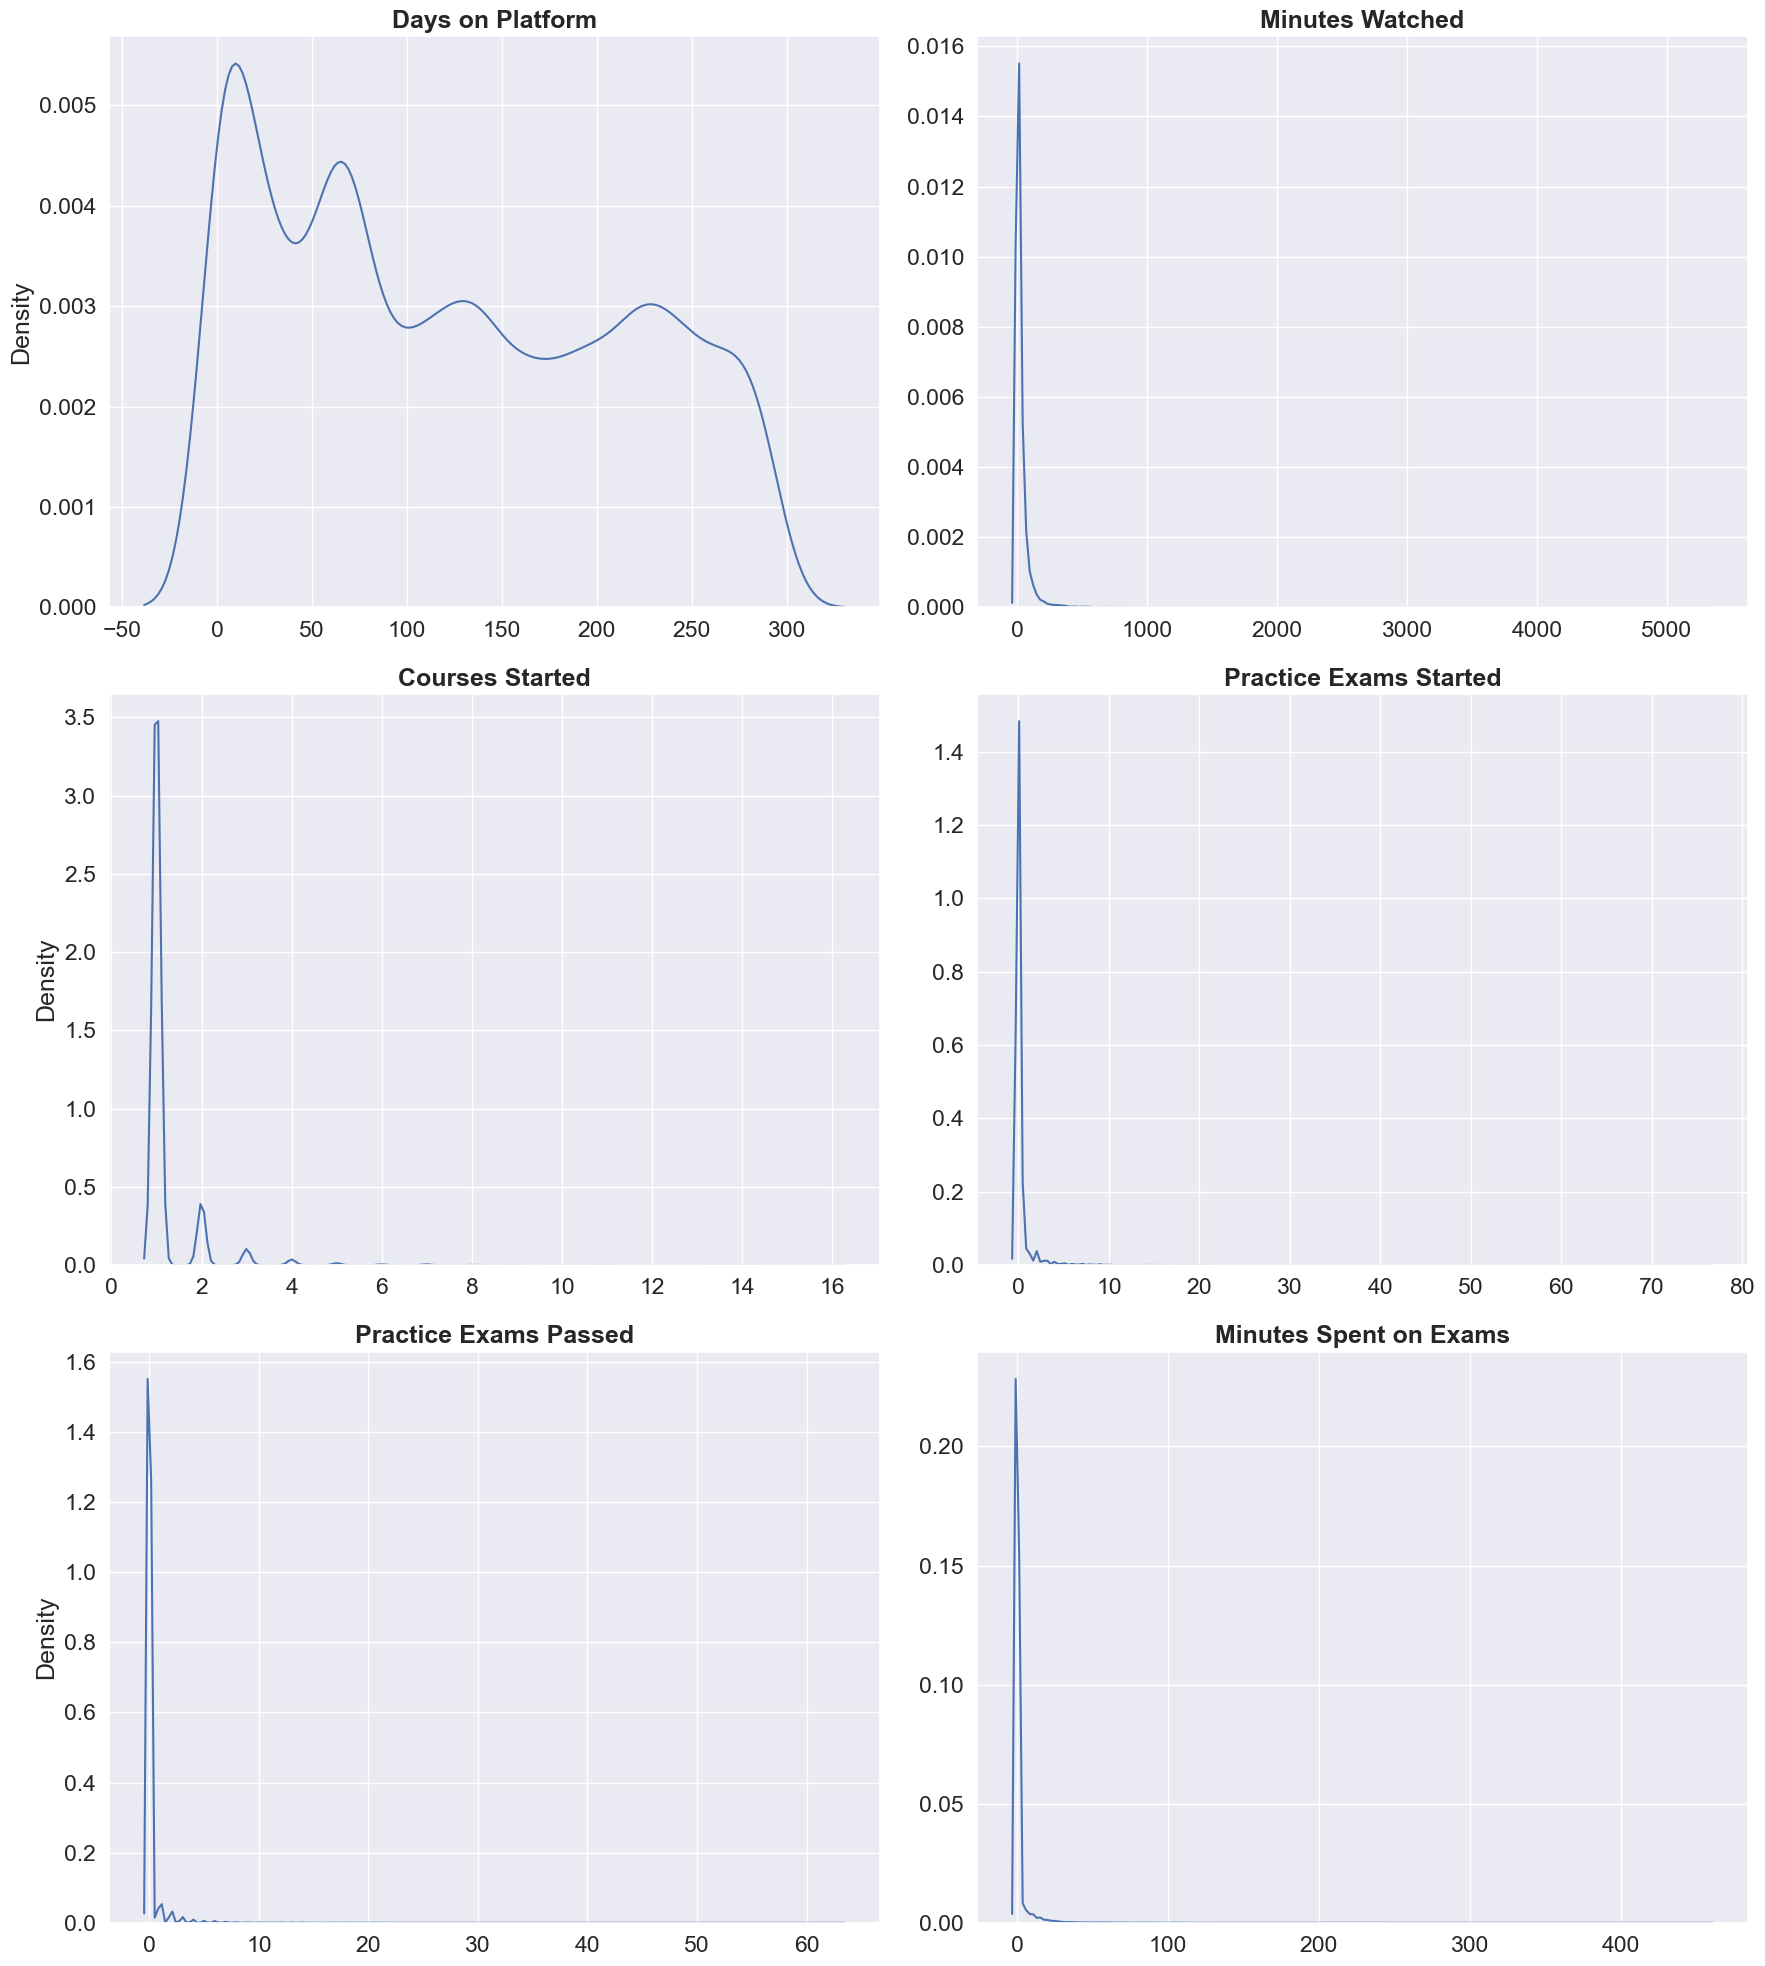

In [2]:
# Plot KDEs for numerical features with titles, removed axis labels, and adjusted font size
sns.set(font_scale=1.5)
fig, axes = plt.subplots(3, 2, figsize=(18, 20))

sns.kdeplot(data=data['days_on_platform'], ax=axes[0, 0])
axes[0, 0].set_title('Days on Platform', fontweight='bold', fontsize=18)
axes[0, 0].set_xlabel(None)

sns.kdeplot(data=data['minutes_watched'], ax=axes[0, 1])
axes[0, 1].set_title('Minutes Watched', fontweight='bold', fontsize=18)
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel(None)

sns.kdeplot(data=data['courses_started'], ax=axes[1, 0])
axes[1, 0].set_title('Courses Started', fontweight='bold', fontsize=18)
axes[1, 0].set_xlabel(None)

sns.kdeplot(data=data['practice_exams_started'], ax=axes[1, 1])
axes[1, 1].set_title('Practice Exams Started', fontweight='bold', fontsize=18)
axes[1, 1].set_xlabel(None)
axes[1, 1].set_ylabel(None)

sns.kdeplot(data=data['practice_exams_passed'], ax=axes[2, 0])
axes[2, 0].set_title('Practice Exams Passed', fontweight='bold', fontsize=18)
axes[2, 0].set_xlabel(None)

sns.kdeplot(data=data['minutes_spent_on_exams'], ax=axes[2, 1])
axes[2, 1].set_title('Minutes Spent on Exams', fontweight='bold', fontsize=18)
axes[2, 1].set_xlabel(None)
axes[2, 1].set_ylabel(None)

plt.tight_layout()
plt.show()

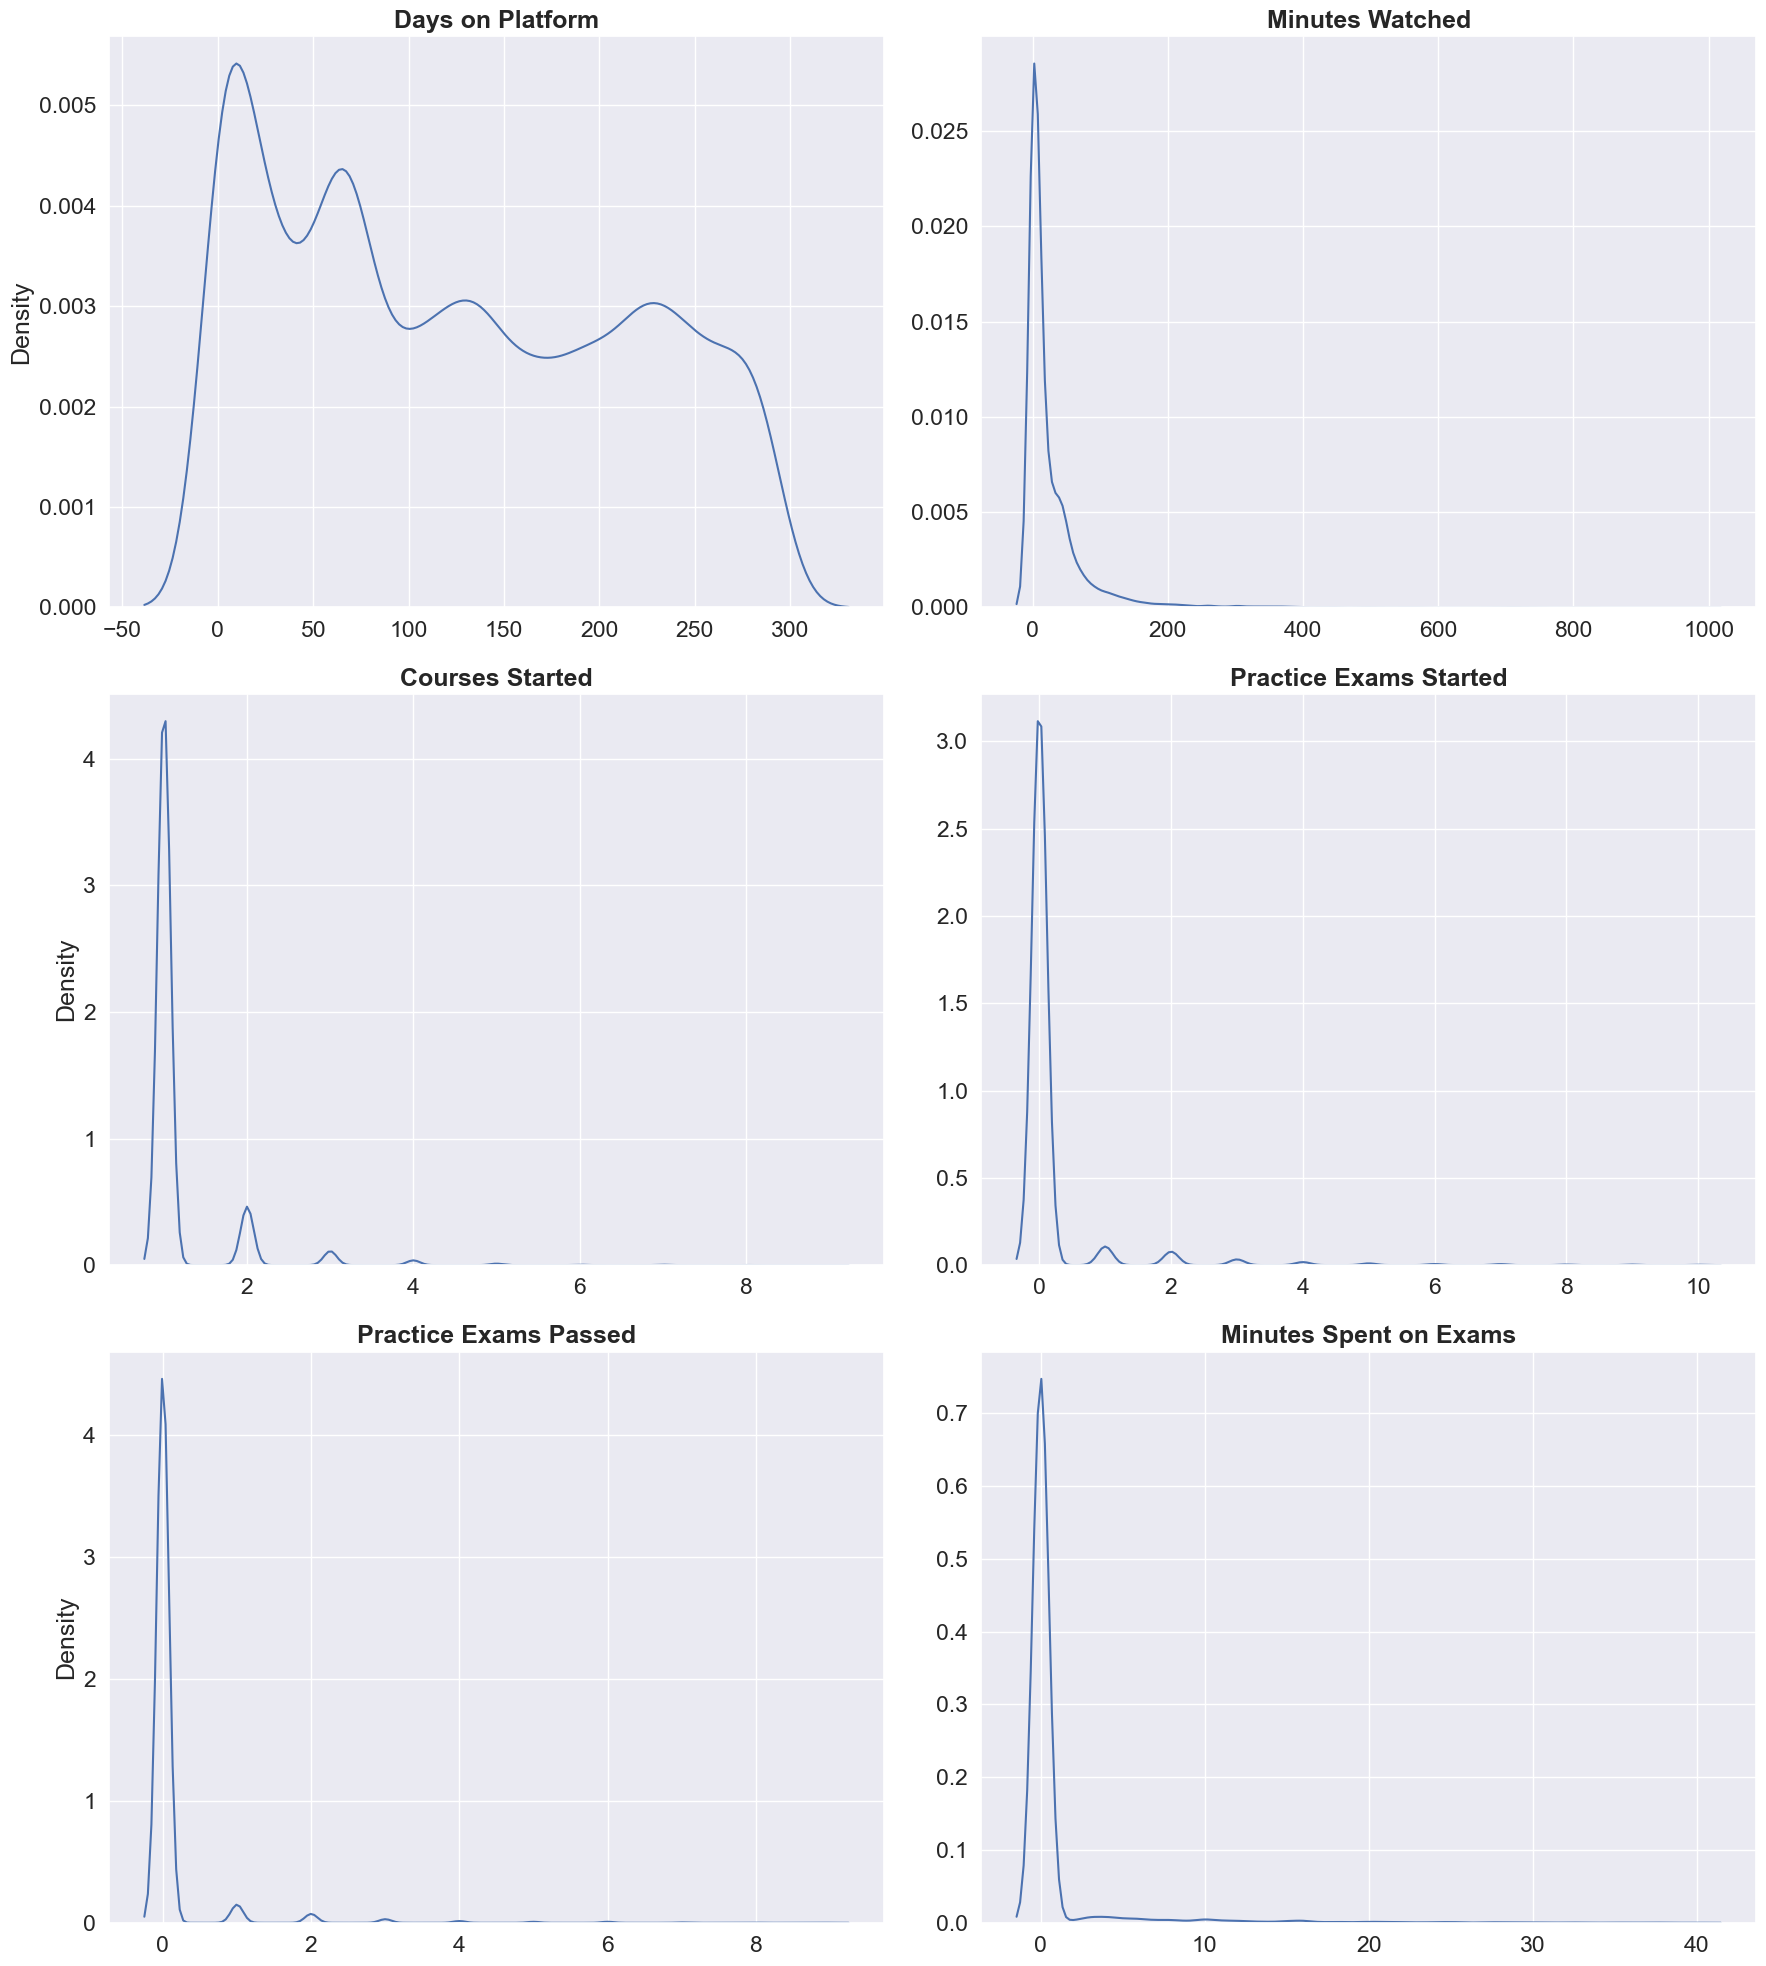

In [3]:
# Plot KDEs for numerical features after removing outliers based on predefined thresholds
data_no_outliers = data[(data['minutes_watched'] <= 1000) & (data['courses_started'] <= 10) &
                        (data['practice_exams_started'] <= 10) & (data['minutes_spent_on_exams'] <= 40)]

sns.set(font_scale=1.5)
fig, axes = plt.subplots(3, 2, figsize=(18, 20))

sns.kdeplot(data=data_no_outliers['days_on_platform'], ax=axes[0, 0])
axes[0, 0].set_title('Days on Platform', fontweight='bold', fontsize=18)
axes[0, 0].set_xlabel(None)

sns.kdeplot(data=data_no_outliers['minutes_watched'], ax=axes[0, 1])
axes[0, 1].set_title('Minutes Watched', fontweight='bold', fontsize=18)
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel(None)

sns.kdeplot(data=data_no_outliers['courses_started'], ax=axes[1, 0])
axes[1, 0].set_title('Courses Started', fontweight='bold', fontsize=18)
axes[1, 0].set_xlabel(None)

sns.kdeplot(data=data_no_outliers['practice_exams_started'], ax=axes[1, 1])
axes[1, 1].set_title('Practice Exams Started', fontweight='bold', fontsize=18)
axes[1, 1].set_xlabel(None)
axes[1, 1].set_ylabel(None)

sns.kdeplot(data=data_no_outliers['practice_exams_passed'], ax=axes[2, 0])
axes[2, 0].set_title('Practice Exams Passed', fontweight='bold', fontsize=18)
axes[2, 0].set_xlabel(None)

sns.kdeplot(data=data_no_outliers['minutes_spent_on_exams'], ax=axes[2, 1])
axes[2, 1].set_title('Minutes Spent on Exams', fontweight='bold', fontsize=18)
axes[2, 1].set_xlabel(None)
axes[2, 1].set_ylabel(None)

plt.tight_layout()
plt.show()

### 1.3. Handling Multicollinearity

In [4]:
# Convert column names to a NumPy array
data_no_outliers.columns.to_numpy()

array(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started',
       'practice_exams_passed', 'minutes_spent_on_exams', 'purchased'],
      dtype=object)

In [5]:
# Calculate and display the Variance Inflation Factor (VIF) for numerical variables
variables = data_no_outliers[['days_on_platform',
                              'minutes_watched',
                              'courses_started', 
                              'practice_exams_started', 
                              'practice_exams_passed', 
                              'minutes_spent_on_exams']]

vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(variables.to_numpy(), i) for i in range(variables.shape[1])]
vif_df['features'] = variables.columns

vif_df.sort_values('VIF', ascending=False, inplace=True)
vif_df.round(2)

,VIF,features
3,10.20,practice_exams_started
4,7.81,practice_exams_passed
5,3.35,minutes_spent_on_exams
2,3.18,courses_started
0,2.30,days_on_platform
1,1.79,minutes_watched


In [6]:
# Calculate and display VIF values after dropping a variable
data_no_multi = data_no_outliers.drop('practice_exams_started', axis=1)

variables = data_no_multi[['days_on_platform',
                           'minutes_watched',
                           'courses_started', 
                           'practice_exams_passed', 
                           'minutes_spent_on_exams']]

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(variables.to_numpy(), i) for i in range(variables.shape[1])]
vif_df["features"] = variables.columns

vif_df.sort_values('VIF', ascending=False, inplace=True)
vif_df.round(2)

,VIF,features
2,3.17,courses_started
4,2.60,minutes_spent_on_exams
3,2.56,practice_exams_passed
0,2.30,days_on_platform
1,1.79,minutes_watched


### 1.4. Dealing with Missing Values

In [7]:
# Check for missing values in the dataset
data_no_multi.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [8]:
# Find rows where the 'student_country' column has missing values
data_no_multi.loc[data_no_multi['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


In [9]:
# Replace missing values in 'student_country' with 'Unknown' and check the results
data_no_nulls = data_no_multi.fillna('Unknown', axis=1)
data_no_nulls.loc[data_no_nulls['student_country'] == 'Unknown', 'student_country']

311      Unknown
337      Unknown
556      Unknown
806      Unknown
1097     Unknown
12363    Unknown
12633    Unknown
16946    Unknown
Name: student_country, dtype: object

### 1.5. Splitting & Encoding Data

In [10]:
# Split data into training and testing sets, stratified by the target variable 'purchased'
X = data_no_nulls.drop(['purchased'], axis=1)
y = data_no_nulls['purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)


# Encode 'student_country' using OrdinalEncoder and drop the original column from training and testing sets
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=999)

X_train['student_country_enc'] = encoder.fit_transform(X_train['student_country'].to_numpy().reshape(-1, 1))
X_test['student_country_enc'] = encoder.transform(X_test['student_country'].to_numpy().reshape(-1, 1))

X_train = X_train.drop('student_country', axis=1)
X_test = X_test.drop('student_country', axis=1)

X_train.head()

,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,student_country_enc
5718,218,1.6,2,0,0.0,69.0
3119,263,75.5,1,0,0.0,69.0
5440,222,44.4,1,0,0.0,84.0
11828,97,2.6,1,0,0.0,147.0
8454,162,1.0,1,0,0.0,80.0


In [11]:
# Convert the training and testing sets to NumPy arrays with appropriate data types
X_train_array = np.asarray(X_train, dtype='float')
y_train_array = np.asarray(y_train, dtype='int')

X_test_array = np.asarray(X_test, dtype='float')
y_test_array = np.asarray(y_test, dtype='int')

## 2. Creating a Logistic Regression Model

In [12]:
# Fit a logistic regression model and display the results' summary
logit = sm.Logit(y_train_array, X_train_array)
logit_results = logit.fit()
logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.153150
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14094
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.5018
Time:                        18:05:04   Log-Likelihood:                -2159.4
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0691      0.002    -31.914      0.000      -0.073      -0.065
x2             0.0144      0.001     19.991      0.000       0.013       0.016
x3            -0.2884      0.060     -4.776      0.000      -0.407      -0.170
x4             0.0840      0.076      1.102      0.270      -0.065       0.233
x5            -0.0670      0.015     -4.332      0.000      -0.097      -0.037
x6             0.0026      0.001      3.971      0.000       0.001       0.004
==============================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

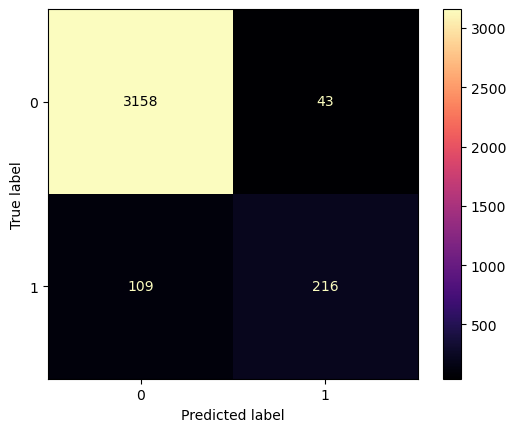

In [13]:
# Plot confusion matrix for logistic regression test predictions using a magma colormap
sns.reset_orig()
y_test_pred_logit = [round(logit_results.predict(X_test_array)[i], 0) for i in range(y_test_array.shape[0])]

ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_logit, cmap='magma')
plt.show()

In [14]:
# Print classification report to evaluate logistic regression performance
print(classification_report(y_test_array, y_test_pred_logit, target_names=['Will Not Purchase', 'Will Purchase']))

                   precision    recall  f1-score   support

Will Not Purchase       0.97      0.99      0.98      3201
    Will Purchase       0.83      0.66      0.74       325

         accuracy                           0.96      3526
        macro avg       0.90      0.83      0.86      3526
     weighted avg       0.95      0.96      0.95      3526



## 3. Creating a K-Nearest Neighbors Model

In [15]:
# Perform grid search for the best KNN parameters and accuracy score
parameters_knn = {'n_neighbors': range(1, 11),
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan'],
                  'p': [1, 2]}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                               param_grid=parameters_knn, 
                               scoring='accuracy')

grid_search_knn.fit(X_train_array, y_train_array)
grid_search_knn.best_params_, grid_search_knn.best_score_.round(4)

({'metric': 'manhattan', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'},
 0.961)

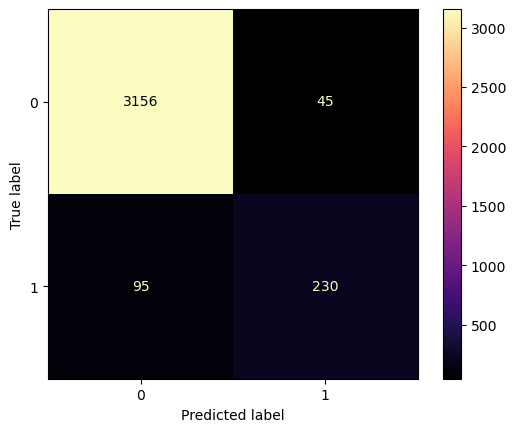

In [16]:
# Retrieve the best KNN model and predict test set labels
knn_best = grid_search_knn.best_estimator_
y_test_pred_knn = knn_best.predict(X_test_array)


# Plot confusion matrix for KNN predictions using a magma colormap
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_knn,
                                        labels=knn_best.classes_, cmap='magma')
plt.show()

In [17]:
# Print classification report to evaluate KNN performance
print(classification_report(y_test_array, y_test_pred_knn, target_names=['Will Not Purchase', 'Will Purchase']))

                   precision    recall  f1-score   support

Will Not Purchase       0.97      0.99      0.98      3201
    Will Purchase       0.84      0.71      0.77       325

         accuracy                           0.96      3526
        macro avg       0.90      0.85      0.87      3526
     weighted avg       0.96      0.96      0.96      3526



## 4. Creating a Support Vector Machine Model

In [18]:
# Scale features for SVC and perform grid search for the best parameters and accuracy score
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_array_svc = scaler.fit_transform(X_train_array)
X_test_array_svc = scaler.transform(X_test_array)

parameters_svc = {'kernel': ['linear', 'poly', 'rbf'],
                  'gamma': ['scale', 'auto'],
                  'C': range(1, 11)}

grid_search_svc = GridSearchCV(estimator=SVC(random_state=365),
                               param_grid=parameters_svc,
                               scoring='accuracy')

grid_search_svc.fit(X_train_array_svc, y_train_array)
grid_search_svc.best_params_, grid_search_svc.best_score_.round(4)

({'C': 6, 'gamma': 'scale', 'kernel': 'poly'}, 0.9608)

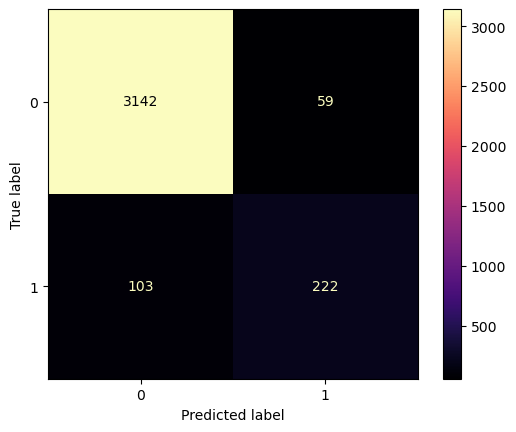

In [19]:
# Retrieve the best SVC model and predict test set labels
svc_best = grid_search_svc.best_estimator_
y_test_pred_svc = svc_best.predict(X_test_array_svc)


# Plot confusion matrix for SVC predictions using a magma colormap
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_svc,
                                        labels=svc_best.classes_, cmap='magma')
plt.show()

In [20]:
# Print classification report to evaluate SVC performance
print(classification_report(y_test_array, y_test_pred_svc, target_names=['Will Not Purchase', 'Will Purchase']))

                   precision    recall  f1-score   support

Will Not Purchase       0.97      0.98      0.97      3201
    Will Purchase       0.79      0.68      0.73       325

         accuracy                           0.95      3526
        macro avg       0.88      0.83      0.85      3526
     weighted avg       0.95      0.95      0.95      3526



## 5. Creating a Decision Tree Model

In [21]:
# Perform grid search for the best decision tree parameters and accuracy score
parameters_dt = parameters_dt = {'criterion': ['gini', 'entropy'],
                                 'max_depth': [None, 2, 3, 5],
                                 'min_samples_split': [2, 5, 10],
                                 'min_samples_leaf': [1, 2, 4]}

grid_search_dt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=365), 
                              param_grid = parameters_dt, 
                              scoring = 'accuracy')

grid_search_dt.fit(X_train_array, y_train_array)
grid_search_dt.best_params_, grid_search_dt.best_score_.round(4)

({'criterion': 'entropy',
  'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.9624)

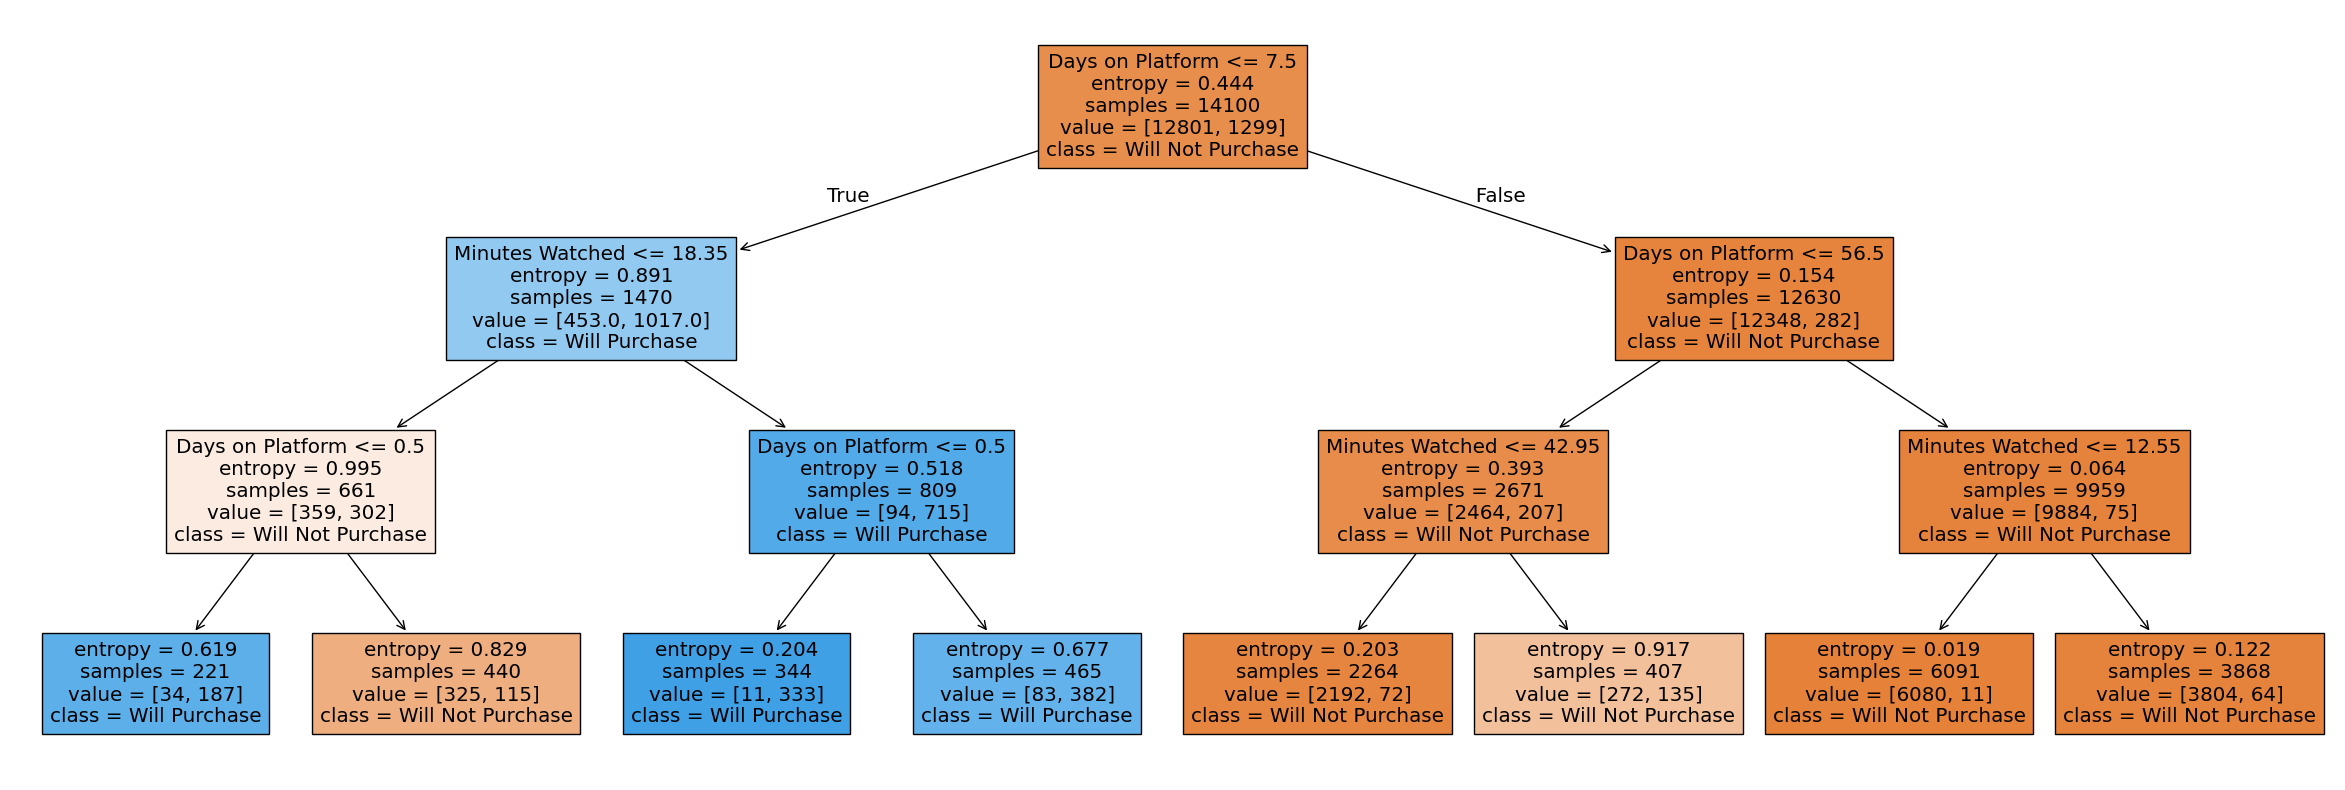

In [22]:
# Visualize the best decision tree model with feature and class names labeled
dt_best = grid_search_dt.best_estimator_

plt.figure(figsize=(30, 10))

plot_tree(dt_best, filled=True, 
          feature_names = ['Days on Platform',
                           'Minutes Watched',
                           'Courses Started',
                           'Practice Exams Passed',
                           'Time Spent on Exams',
                           'Student Country Encoded'],
          class_names = ['Will Not Purchase',
                         'Will Purchase'])
plt.show()

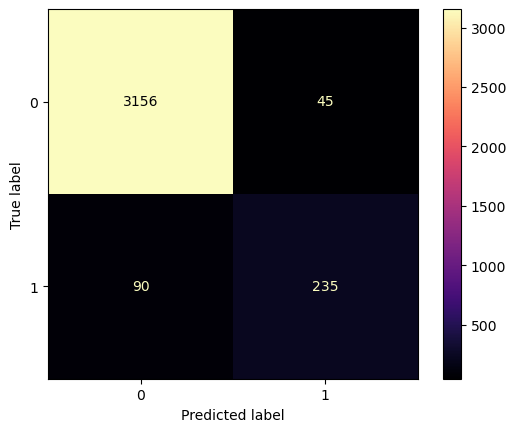

In [23]:
# Plot confusion matrix for decision tree test predictions using a magma colormap
y_test_pred_dt = dt_best.predict(X_test_array)

sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_dt,
                                        labels=dt_best.classes_, cmap='magma')
plt.show()

In [24]:
# Print classification report to evaluate decision tree performance
print(classification_report(y_test_array, y_test_pred_dt, target_names=['Will Not Purchase', 'Will Purchase']))

                   precision    recall  f1-score   support

Will Not Purchase       0.97      0.99      0.98      3201
    Will Purchase       0.84      0.72      0.78       325

         accuracy                           0.96      3526
        macro avg       0.91      0.85      0.88      3526
     weighted avg       0.96      0.96      0.96      3526



## 6. Creating a Random Forest Model

In [25]:
# Perform grid search for the best random forest parameters and accuracy score
parameters_rf = parameters_rf = {'max_features': ['sqrt', 'log2'],
                                 'n_estimators': [100, 200, 300],
                                 'max_depth': [5, 10, None],
                                 'min_samples_split': [1, 2],
                                 'min_samples_leaf': [1, 2]}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=365), 
                              param_grid=parameters_rf, 
                              scoring='accuracy')

grid_search_rf.fit(X_train_array, y_train_array)
grid_search_rf.best_params_, grid_search_rf.best_score_.round(4)

({'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9649)

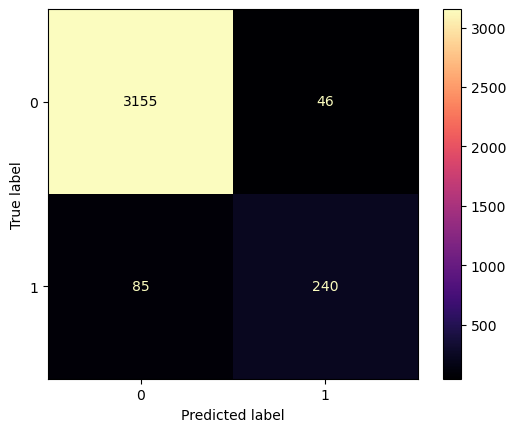

In [26]:
# Retrieve the best random forest model and predict test set labels
rf_best = grid_search_rf.best_estimator_
y_test_pred_rf = rf_best.predict(X_test_array)


# Plot confusion matrix for random forest predictions using a magma colormap
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_rf,
                                        labels=rf_best.classes_, cmap='magma')
plt.show()

In [27]:
# Print classification report to evaluate random forest performance
print(classification_report(y_test_array, y_test_pred_rf, target_names=['Will Not Purchase', 'Will Purchase']))

                   precision    recall  f1-score   support

Will Not Purchase       0.97      0.99      0.98      3201
    Will Purchase       0.84      0.74      0.79       325

         accuracy                           0.96      3526
        macro avg       0.91      0.86      0.88      3526
     weighted avg       0.96      0.96      0.96      3526

